# Presentación final entregable A00828516

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [11]:
%ls

 00_00_binder.ipynb
 00_00_primer_pasos.ipynb
 01_01_data_types.ipynb
 01_02_read_iloc_unique_groupby.ipynb
 02_00_data_wrangling.ipynb
 02_01_matplotlib_lineplots.ipynb
 02_01_null_display.ipynb
 02_02_basic_math.ipynb
 02_02_null_display.ipynb
 02_03_basic_math.ipynb
 03_00_pivot_table.ipynb
 03_01_lambda_pivot_table.ipynb
 04_00_matplotlib_scipy.ipynb
 04_01_histo_Boxplots_FacetGrid.ipynb
 04_03_hist_axis_gridspec.ipynb
 04_04_df_filtering.ipynb
'05_00_boxplots (box-and-whisker plot )_heat_map.ipynb'
 05_01_area_hist_bar.ipynb
 07_00_Multivariate_Distributions_hist_scatter.ipynb
 07_01_Multivariate_Data.ipynb
 07_02_pie_box_scatter_bubble.ipynb
 07_03_unit_testing_data_wrangling.ipynb
 08_00_Regression_Plots.ipynb
'08_01_Linear Regression with OLS.ipynb'
 08_02_Linear_and_logistic_regression_modeling.ipynb
'08_03_Linear Regression using Least Squares.ipynb'
 09_00_Plotly_Basics.ipynb
 09_01_Dash_Board.ipynb
 09_02_dash_board.ipynb
 A00828516_pres_interm.ipynb
 A7.ipynb
 datasets/
'e

In [12]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       sample_pivot.csv
Book3.csv                  headbrain.csv  StudentsPerformance.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [13]:
path = 'datasets/StudentsPerformance.csv'
df = pd.read_csv(path)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [14]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total'],
      dtype='object')

In [15]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   Total                        1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [16]:
df.describe()


,math score,reading score,writing score,Total
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


# ¿Existen valores atípicos en los resultados de matemáticas, comprensión lectora y escritura?

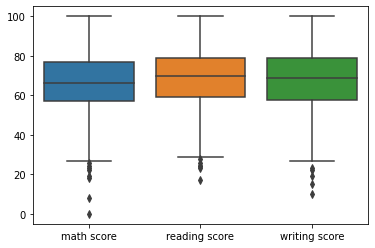

In [17]:

sns.boxplot(data=df.loc[:,['math score','reading score','writing score']])

# ¿Los alumnos obtienen buenas calificaciones en matemáticas?

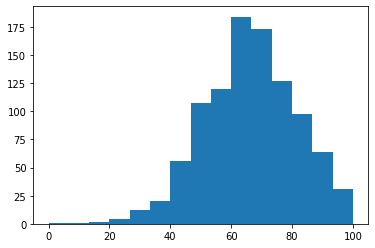

In [19]:
data = [df.loc[:,'math score'],]
patches=plt.hist(data, bins = 15)

# ¿Los alumnos obtienen buenas calificaciones en comprensión lectora?

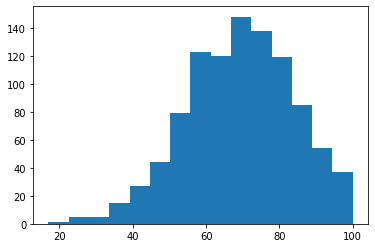

In [20]:
data = [df.loc[:,'reading score'],]
patches=plt.hist(data, bins = 15)

# ¿Los alumnos obtienen buenas calificaciones en escritura?

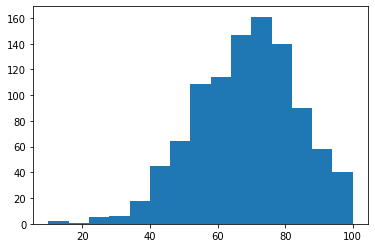

In [21]:
data = [df.loc[:,'writing score'],]
patches=plt.hist(data, bins = 15)

# ¿Cuántos alumnos recibieron la preparación para tomar los examenes?

In [22]:
pd.value_counts(df['test preparation course'])

none         642
completed    358
Name: test preparation course, dtype: int64

In [46]:
tabla1 = pd.pivot_table(df,
                        index = ['test preparation course'],
                        values = ['math score','reading score','writing score']
                       )
tabla1

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


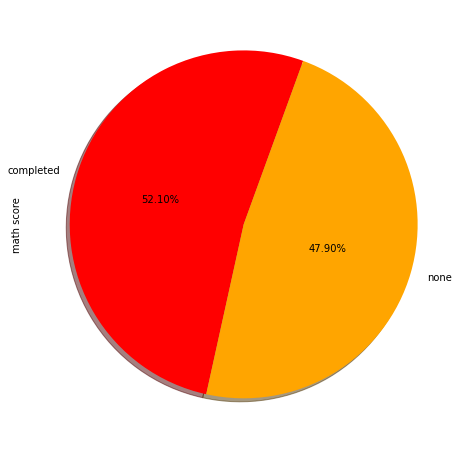

In [48]:
color_list = ['red','orange','grey','green','blue','purple','pink','yellow']
tabla1['math score'].plot(kind='pie',
                     figsize = (15,8),
                     startangle = 70,
                     autopct = '%1.2f%%',
                     pctdistance = 0.5,
                     colors = color_list,
                     shadow = True
                    )
plt.show()
                     

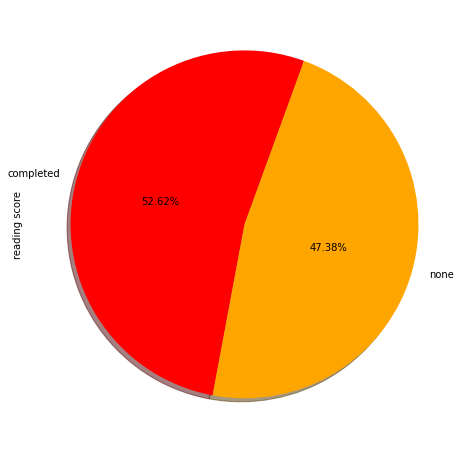

In [49]:
color_list = ['red','orange','grey','green','blue','purple','pink','yellow']
tabla1['reading score'].plot(kind='pie',
                     figsize = (15,8),
                     startangle = 70,
                     autopct = '%1.2f%%',
                     pctdistance = 0.5,
                     colors = color_list,
                     shadow = True
                    )
plt.show()
                     

# ¿Qué tanto influyen la calificaciones de matemáticas en el resultado total?

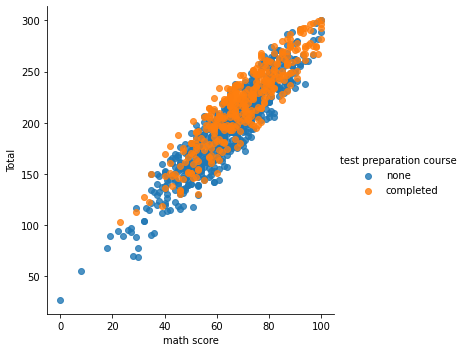

In [23]:
sns.lmplot(x='math score',
 y='Total',
 data=df,
 fit_reg=False,
 hue= 'test preparation course'
 )


# ¿Qué tanto influyen la calificaciones de comprensión lectora en el resultado total?

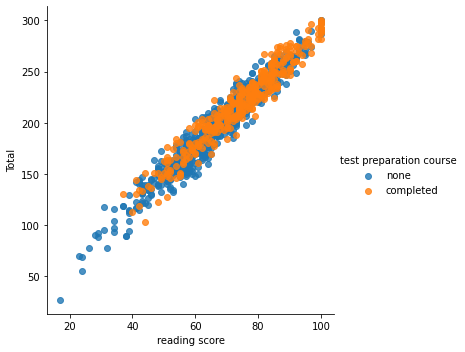

In [24]:
sns.lmplot(x='reading score',
 y='Total',
 data=df,
 fit_reg=False,
 hue= 'test preparation course'
 )


# ¿Qué tanto influyen la calificaciones de comprensión lectora en el resultado total?

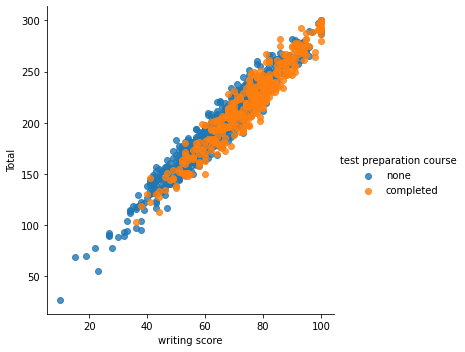

In [25]:
sns.lmplot(x='writing score',
 y='Total',
 data=df,
 fit_reg=False,
 hue= 'test preparation course'
 )


In [26]:
vars = ['test preparation course', 'math score', 'reading score','writing score','Total']
df = df[vars].dropna()
df

,test preparation course,math score,reading score,writing score,Total
0,none,72,72,74,218
1,completed,69,90,88,247
2,none,90,95,93,278
3,none,47,57,44,148
4,none,76,78,75,229
...,...,...,...,...,...
995,completed,88,99,95,282
996,none,62,55,55,172
997,completed,59,71,65,195
998,completed,68,78,77,223


In [27]:
df[vars].corr()

,math score,reading score,writing score,Total
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
Total,0.918746,0.970331,0.965667,1.000000


In [34]:
model = sm.OLS.from_formula ('reading score ~ Total',
 data = df)
result = model.fit()
result.summary()



SyntaxError: invalid syntax (<unknown>, line 1)